# PROJECT 3: Sentiment Analysis

#### ShopeeFood là một kênh phối hợp với các nhà hàng/quán ăn kinh doanh thực phẩm online.

#### Chúng ta có thể lên đây để xem các đánh giá,nhận xét cũng như đặt mua thực phẩm.

#### Từ những đánh giá của khách hàng, vấn đề đượcđưa ra là làm sao để các nhà hàng/ quán ăn hiểu được khách hàng rõ hơn, biết họ đánh giá vềmình như thế nào để cải thiện hơn trong dịch vụ/sản phẩm

#### Data Reprocessing : Keep outliers
**Yêu cầu : Xây dựng hệ thống hỗ trợ phân loại các phản hồi của khách hàng thành các nhóm : tích cực, tiêu cực trung tính dựa trên dữ liệu dạng văn bản.**

**Mục tiêu/ Vấn đề :Xây dựng hệ thống hỗ trợ nhà hàng/quán
ăn phân loại các phản hồi của khách hàng
thành các nhóm: tích cực, tiêu cực, trung tính
dựa trên dữ liệu dạng văn bản.**

#### Hướng dẫn chi tiết :
+ Hiểu được vấn đề
+ Import các thư viện cần thiết và hiểu cách sử dụng
+ Đọc dữ liệu được cung cấp
+ Thực hiện EDA (Exploratory Data Analysis – Phân tích Khám phá Dữ liệu) cơ bản ( sử dụng Pandas Profifing Report )
+ Tiền xử lý dữ liệu : Làm sạch, tạo tính năng mới , lựa chọn tính năng cần thiết....

+ **Bước 1** : Business Understanding
+ **Bước 2** : Data Understanding ==> Giải quyết bài toán Sentiment analysis trong E-commerce bằng thuật toán nhóm Supervised Learning - Classification : Naive Bayes, KNN, Logictic Regression...
+ **Bước 3** : Data Preparation/ Prepare : Chuẩn hóa tiếng việt, viết các hàm xử lý dữ liệu thô...
    
  **Xử lý tiếng việt :**
    
    **1.Tiền xử lý dữ liệu thô :**
    
    - Chuyển text về chữ thường
    - Loại bỏ các ký tự đặc biệt nếu có
    - Thay thế emojicon/ teencode bằng text tương ứng
    - Thay thế một số punctuation và number bằng khoảng trắng
    - Thay thế các từ sai chính tả bằng khoảng trắng
    - Thay thế loạt khoảng trắng bằng một khoảng trắng
    
  **2.Chuẩn hóa Unicode tiếng Việt :**
  
  **3.Tokenizer văn bản tiếng Việt bằng thư viện underthesea :**
  
  **4.Xóa các stopword tiếng Việt :**

+ **Bước 4&5: Modeling & Evaluation/ Analyze & Report**
    - Xây dựng các Classification model dự đoán
    
        - Naïve Bayes
        - Logistic Regression
        - Tree Algorithms…
        
    - Thực hiện/ đánh giá kết quả các Classification model
    
        - R-squared
        - Acc, precision, recall, f1,…
        - Kết luận
+ **Bước 6: Deployment & Feedback/ Act**
    - Đưa ra những cải tiến phù hợp để nâng cao sự hài lòng của khách hàng, thu hút sự chú ý của khách hàng mới.

In [1]:
!pip install pydantic==1.10.2
!pip install underthesea
!pip install emoji
!pip install demoji
!pip install pyvi
!pip install import-ipynb

# Thư viện sử dụng

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import re
import datetime

from underthesea import word_tokenize
import glob
from wordcloud import WordCloud,STOPWORDS

import scipy

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn import metrics
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve, auc
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.metrics import f1_score,precision_score,recall_score,accuracy_score
from sklearn.pipeline import Pipeline

import nltk
import string
from wordcloud import WordCloud
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.stem.snowball import SnowballStemmer

# !pip install import-ipynb
import import_ipynb
#from Library_Functions import*

%matplotlib inline
# Disable seaborn grid
sns.set_style("whitegrid", {'axes.grid': False})
pd.reset_option('all')
import os
import warnings
warnings.filterwarnings('ignore')

In [3]:
from google.colab import drive
drive.mount("/content/gdrive", force_remount=True)

Mounted at /content/gdrive


In [4]:
%cd '/content/gdrive/MyDrive/Colab/LDS0_K294_T2C7/PROJECT3/'

/content/gdrive/MyDrive/Colab/LDS0_K294_T2C7/PROJECT3


In [5]:
from Library_Functions import*

importing Jupyter notebook from Library_Functions.ipynb


# 1. Đọc và xem dữ liệu

In [6]:
df1=pd.read_csv("data/1_Restaurants.csv",sep=',')
df1.head(10)

,ID,Restaurant,Address,Time,Price,District
0,1,Gà Rán & Burger McDonald's Đa Kao,"2 - 6 Bis Điện Biên Phủ, Quận 1, TP. HCM",00:00 - 23:59,50.000 - 200.000,Quận 1
1,2,Cháo Trắng - Cháo Thịt Bằm BK House - Phạm Viế...,"112B Phạm Viết Chánh, P. Nguyễn Cư Trinh, Quận...",00:00 - 23:59,5.000 - 40.000,Quận 1
2,3,Texas Chicken - Nguyễn Thái Học,"115 Nguyễn Thái Học , Quận 1, TP. HCM",NaN,30.000 - 300.000,Quận 1
3,4,Bếp Chay 365,"Tầng 1, 35 Nguyễn Văn Tráng, P. Bến Thành, Quậ...",NaN,15.000 - 50.000,Quận 1
4,5,Bánh Canh Cua Linh,"80A Điện Biên Phủ, P. Đa Kao, Quận 1, TP. HCM",06:20 - 22:00,25.000 - 35.000,Quận 1
5,6,Bún Đậu Mạc Văn Khoa - Trần Quang Khải,"90 Trần Quang Khải, P. Tân Định, Quận 1, TP. HCM",NaN,45.000 - 140.000,Quận 1
6,7,Bún Riêu Cua Ốc Phang Rang Ninh Thuận - Nguyễn...,"66 Nguyễn Thái Bình, P. Nguyễn Thái Bình, Quận...",06:30 - 21:30,35.000 - 55.000,Quận 1
7,8,Há Cảo Đặc Biệt Nhà Thờ Đức Bà,"86 Nguyễn Du, Quận 1, TP. HCM",NaN,5.000 - 20.000,Quận 1
8,9,Gà Rán KFC - Nguyễn Văn Giai,"2 Nguyễn Huy Tự, P. Đa Kao, Quận 1, TP. HCM",NaN,30.000 - 88.000,Quận 1
9,10,Hey Pelo - Original French Tacos - Trần Khắc Chân,"Số 60 Trần Khắc Chân, P.Tân Định, Quận 1, TP. HCM",NaN,30.000 - 110.000,Quận 1


In [7]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1622 entries, 0 to 1621
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   ID          1622 non-null   int64 
 1   Restaurant  1622 non-null   object
 2   Address     1622 non-null   object
 3   Time        773 non-null    object
 4   Price       1622 non-null   object
 5   District    1622 non-null   object
dtypes: int64(1), object(5)
memory usage: 76.2+ KB


In [8]:
df2=pd.read_csv("data/2_Reviews.csv",sep=',')
df2.head(10)

,ID,User,Time,Rating,Comment,IDRestaurant
0,1,PHAN LE,20/12/2023 21:13,5.2,"Gà chiên còn sống, rất tanh. Khủng khiép",1
1,2,Thúy,25/9/2023 15:43,5.0,"Đã ăn qua rồi, ăn ok ạ",1
2,3,Quyên Quyên,24/6/2023 11:11,5.0,Đã thư rất ngon,1
3,4,Phương Thảo,22/12/2022 14:58,1.0,Tệ .. mua mang về cho 1 gói tương ớt. Và xin t...,1
4,5,Quỳnh Nguyễn,23/9/2022 22:40,4.2,"21h30...2 đứa nhỏ kêu đói, sau 1 hồi bình loạn...",1
5,6,Tien Le,15/9/2022 11:32,7.4,Nay có khuyến mại mua 1 tặng 1 trà kem sữa.\nU...,1
6,7,Anna,4/7/2022 1:31,1.0,Thề lâu lắm rồi t mới tức giận ntn . T có xem ...,1
7,8,Đinh Thuỵ Bích Vân,25/6/2022 20:13,10.0,Nếu đây là lần đầu bạn đến 4P thì nên thử 𝗛𝗮𝗹𝗳...,1
8,9,Huyen Nguyen,10/6/2022 12:43,1.0,Đặt giao combo C add thêm phô mai :15k - tính ...,1
9,10,B Mai Luu,19/3/2022 13:48,5.6,Hic phần cơm Mc Donald nó dở:((( nên ăn khoai ...,1


In [9]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29959 entries, 0 to 29958
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   ID            29959 non-null  int64  
 1   User          29959 non-null  object 
 2   Time          29959 non-null  object 
 3   Rating        29959 non-null  float64
 4   Comment       29958 non-null  object 
 5   IDRestaurant  29959 non-null  int64  
dtypes: float64(1), int64(2), object(3)
memory usage: 1.4+ MB


# 2. Phân tích và khám phá dữ liệu


## 2.1 Phân tích df1 -> 1_Restaurants.csv

In [10]:
df1.head()

,ID,Restaurant,Address,Time,Price,District
0,1,Gà Rán & Burger McDonald's Đa Kao,"2 - 6 Bis Điện Biên Phủ, Quận 1, TP. HCM",00:00 - 23:59,50.000 - 200.000,Quận 1
1,2,Cháo Trắng - Cháo Thịt Bằm BK House - Phạm Viế...,"112B Phạm Viết Chánh, P. Nguyễn Cư Trinh, Quận...",00:00 - 23:59,5.000 - 40.000,Quận 1
2,3,Texas Chicken - Nguyễn Thái Học,"115 Nguyễn Thái Học , Quận 1, TP. HCM",NaN,30.000 - 300.000,Quận 1
3,4,Bếp Chay 365,"Tầng 1, 35 Nguyễn Văn Tráng, P. Bến Thành, Quậ...",NaN,15.000 - 50.000,Quận 1
4,5,Bánh Canh Cua Linh,"80A Điện Biên Phủ, P. Đa Kao, Quận 1, TP. HCM",06:20 - 22:00,25.000 - 35.000,Quận 1


In [11]:
# Check nan
df1.isna().sum()

ID              0
Restaurant      0
Address         0
Time          849
Price           0
District        0
dtype: int64

In [12]:
# Dữ liệu null ở cột Time nhưng không quan trọng nên không cần xoá

In [13]:
df1.fillna('',inplace=True)

In [14]:
# Check nan
df1.isna().sum()

ID            0
Restaurant    0
Address       0
Time          0
Price         0
District      0
dtype: int64

In [15]:
# Check duplicates
df1.duplicated().sum()

0

In [16]:
# không có dữ liệu trùng

## 2.1 Phân tích df2 -> 2_Reviews.csv

In [17]:
df2.head()

,ID,User,Time,Rating,Comment,IDRestaurant
0,1,PHAN LE,20/12/2023 21:13,5.2,"Gà chiên còn sống, rất tanh. Khủng khiép",1
1,2,Thúy,25/9/2023 15:43,5.0,"Đã ăn qua rồi, ăn ok ạ",1
2,3,Quyên Quyên,24/6/2023 11:11,5.0,Đã thư rất ngon,1
3,4,Phương Thảo,22/12/2022 14:58,1.0,Tệ .. mua mang về cho 1 gói tương ớt. Và xin t...,1
4,5,Quỳnh Nguyễn,23/9/2022 22:40,4.2,"21h30...2 đứa nhỏ kêu đói, sau 1 hồi bình loạn...",1


In [18]:
df2.shape

(29959, 6)

In [19]:
# Check nan
df2.isna().sum()

ID              0
User            0
Time            0
Rating          0
Comment         1
IDRestaurant    0
dtype: int64

In [20]:
df2.fillna('',inplace=True)

In [21]:
# Check duplicates
df2.duplicated().sum()

0

In [22]:
# không có dữ liệu trùng

In [23]:
# Merge df1 and df2 on ID from df1 and IDRestaurant from df2
df = pd.merge(df2, df1, left_on='IDRestaurant', right_on='ID')

# Display the first 10 rows of the merged DataFrame
df.head(10)

,ID_x,User,Time_x,Rating,Comment,IDRestaurant,ID_y,Restaurant,Address,Time_y,Price,District
0,1,PHAN LE,20/12/2023 21:13,5.2,"Gà chiên còn sống, rất tanh. Khủng khiép",1,1,Gà Rán & Burger McDonald's Đa Kao,"2 - 6 Bis Điện Biên Phủ, Quận 1, TP. HCM",00:00 - 23:59,50.000 - 200.000,Quận 1
1,2,Thúy,25/9/2023 15:43,5.0,"Đã ăn qua rồi, ăn ok ạ",1,1,Gà Rán & Burger McDonald's Đa Kao,"2 - 6 Bis Điện Biên Phủ, Quận 1, TP. HCM",00:00 - 23:59,50.000 - 200.000,Quận 1
2,3,Quyên Quyên,24/6/2023 11:11,5.0,Đã thư rất ngon,1,1,Gà Rán & Burger McDonald's Đa Kao,"2 - 6 Bis Điện Biên Phủ, Quận 1, TP. HCM",00:00 - 23:59,50.000 - 200.000,Quận 1
3,4,Phương Thảo,22/12/2022 14:58,1.0,Tệ .. mua mang về cho 1 gói tương ớt. Và xin t...,1,1,Gà Rán & Burger McDonald's Đa Kao,"2 - 6 Bis Điện Biên Phủ, Quận 1, TP. HCM",00:00 - 23:59,50.000 - 200.000,Quận 1
4,5,Quỳnh Nguyễn,23/9/2022 22:40,4.2,"21h30...2 đứa nhỏ kêu đói, sau 1 hồi bình loạn...",1,1,Gà Rán & Burger McDonald's Đa Kao,"2 - 6 Bis Điện Biên Phủ, Quận 1, TP. HCM",00:00 - 23:59,50.000 - 200.000,Quận 1
5,6,Tien Le,15/9/2022 11:32,7.4,Nay có khuyến mại mua 1 tặng 1 trà kem sữa.\nU...,1,1,Gà Rán & Burger McDonald's Đa Kao,"2 - 6 Bis Điện Biên Phủ, Quận 1, TP. HCM",00:00 - 23:59,50.000 - 200.000,Quận 1
6,7,Anna,4/7/2022 1:31,1.0,Thề lâu lắm rồi t mới tức giận ntn . T có xem ...,1,1,Gà Rán & Burger McDonald's Đa Kao,"2 - 6 Bis Điện Biên Phủ, Quận 1, TP. HCM",00:00 - 23:59,50.000 - 200.000,Quận 1
7,8,Đinh Thuỵ Bích Vân,25/6/2022 20:13,10.0,Nếu đây là lần đầu bạn đến 4P thì nên thử 𝗛𝗮𝗹𝗳...,1,1,Gà Rán & Burger McDonald's Đa Kao,"2 - 6 Bis Điện Biên Phủ, Quận 1, TP. HCM",00:00 - 23:59,50.000 - 200.000,Quận 1
8,9,Huyen Nguyen,10/6/2022 12:43,1.0,Đặt giao combo C add thêm phô mai :15k - tính ...,1,1,Gà Rán & Burger McDonald's Đa Kao,"2 - 6 Bis Điện Biên Phủ, Quận 1, TP. HCM",00:00 - 23:59,50.000 - 200.000,Quận 1
9,10,B Mai Luu,19/3/2022 13:48,5.6,Hic phần cơm Mc Donald nó dở:((( nên ăn khoai ...,1,1,Gà Rán & Burger McDonald's Đa Kao,"2 - 6 Bis Điện Biên Phủ, Quận 1, TP. HCM",00:00 - 23:59,50.000 - 200.000,Quận 1


In [24]:
df = df.loc[:, ['IDRestaurant', 'Restaurant', 'Address', 'District', 'Price', 'User', 'Comment', 'Rating', 'Time_x']]

# Rename Time_x to Time
df.rename(columns={'Time_x': 'Time'}, inplace=True)

# Display the first 10 rows of the updated DataFrame
df.head(10)

,IDRestaurant,Restaurant,Address,District,Price,User,Comment,Rating,Time
0,1,Gà Rán & Burger McDonald's Đa Kao,"2 - 6 Bis Điện Biên Phủ, Quận 1, TP. HCM",Quận 1,50.000 - 200.000,PHAN LE,"Gà chiên còn sống, rất tanh. Khủng khiép",5.2,20/12/2023 21:13
1,1,Gà Rán & Burger McDonald's Đa Kao,"2 - 6 Bis Điện Biên Phủ, Quận 1, TP. HCM",Quận 1,50.000 - 200.000,Thúy,"Đã ăn qua rồi, ăn ok ạ",5.0,25/9/2023 15:43
2,1,Gà Rán & Burger McDonald's Đa Kao,"2 - 6 Bis Điện Biên Phủ, Quận 1, TP. HCM",Quận 1,50.000 - 200.000,Quyên Quyên,Đã thư rất ngon,5.0,24/6/2023 11:11
3,1,Gà Rán & Burger McDonald's Đa Kao,"2 - 6 Bis Điện Biên Phủ, Quận 1, TP. HCM",Quận 1,50.000 - 200.000,Phương Thảo,Tệ .. mua mang về cho 1 gói tương ớt. Và xin t...,1.0,22/12/2022 14:58
4,1,Gà Rán & Burger McDonald's Đa Kao,"2 - 6 Bis Điện Biên Phủ, Quận 1, TP. HCM",Quận 1,50.000 - 200.000,Quỳnh Nguyễn,"21h30...2 đứa nhỏ kêu đói, sau 1 hồi bình loạn...",4.2,23/9/2022 22:40
5,1,Gà Rán & Burger McDonald's Đa Kao,"2 - 6 Bis Điện Biên Phủ, Quận 1, TP. HCM",Quận 1,50.000 - 200.000,Tien Le,Nay có khuyến mại mua 1 tặng 1 trà kem sữa.\nU...,7.4,15/9/2022 11:32
6,1,Gà Rán & Burger McDonald's Đa Kao,"2 - 6 Bis Điện Biên Phủ, Quận 1, TP. HCM",Quận 1,50.000 - 200.000,Anna,Thề lâu lắm rồi t mới tức giận ntn . T có xem ...,1.0,4/7/2022 1:31
7,1,Gà Rán & Burger McDonald's Đa Kao,"2 - 6 Bis Điện Biên Phủ, Quận 1, TP. HCM",Quận 1,50.000 - 200.000,Đinh Thuỵ Bích Vân,Nếu đây là lần đầu bạn đến 4P thì nên thử 𝗛𝗮𝗹𝗳...,10.0,25/6/2022 20:13
8,1,Gà Rán & Burger McDonald's Đa Kao,"2 - 6 Bis Điện Biên Phủ, Quận 1, TP. HCM",Quận 1,50.000 - 200.000,Huyen Nguyen,Đặt giao combo C add thêm phô mai :15k - tính ...,1.0,10/6/2022 12:43
9,1,Gà Rán & Burger McDonald's Đa Kao,"2 - 6 Bis Điện Biên Phủ, Quận 1, TP. HCM",Quận 1,50.000 - 200.000,B Mai Luu,Hic phần cơm Mc Donald nó dở:((( nên ăn khoai ...,5.6,19/3/2022 13:48


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29959 entries, 0 to 29958
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   IDRestaurant  29959 non-null  int64  
 1   Restaurant    29959 non-null  object 
 2   Address       29959 non-null  object 
 3   District      29959 non-null  object 
 4   Price         29959 non-null  object 
 5   User          29959 non-null  object 
 6   Comment       29959 non-null  object 
 7   Rating        29959 non-null  float64
 8   Time          29959 non-null  object 
dtypes: float64(1), int64(1), object(7)
memory usage: 2.1+ MB


In [26]:
# check duplicate
df.duplicated().sum()

15

In [27]:
# remove duplicate
df.drop_duplicates(inplace=True)

# 3. Chuẩn hoá tiếng việt, xử lý dữ liệu thô

In [28]:
# Remove punctuation
df['Comment'] = df['Comment'].replace('[^\w\s]', ' ', regex=True)
punctuation = '!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'
for char in punctuation:
    df['Comment'] = df['Comment'].replace(char, ' ')

In [29]:
# Some lines start with a space, remove them
df['Comment'] = df['Comment'].replace('^[\s]{1,}', '', regex=True)

In [30]:
# Remove multiple spaces with one space
df['Comment'] = df['Comment'].replace('[\s]{2,}', ' ', regex=True)

In [31]:
# Some lines end with a space, remove them
df['Comment'] = df['Comment'].replace('[\s]{1,}$', '', regex=True)

In [32]:
# Remove end of line characters
df['Comment'] = df['Comment'].replace(r'[\r\n]+', ' ', regex=True)

In [33]:
# Remove HTTP links
df['Comment'] = df['Comment'].replace(r'((http|https)\:\/\/)?[a-zA-Z0-9\.\/\?\:@\-_=#]+\.([a-zA-Z]){2,6}([a-zA-Z0-9\.\&\/\?\:@\-_=#])*', '',
                                      regex=True)

In [34]:
# Remove rows that are empty
df = df[df['Comment'].str.len() > 0]

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 29923 entries, 0 to 29958
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   IDRestaurant  29923 non-null  int64  
 1   Restaurant    29923 non-null  object 
 2   Address       29923 non-null  object 
 3   District      29923 non-null  object 
 4   Price         29923 non-null  object 
 5   User          29923 non-null  object 
 6   Comment       29923 non-null  object 
 7   Rating        29923 non-null  float64
 8   Time          29923 non-null  object 
dtypes: float64(1), int64(1), object(7)
memory usage: 2.3+ MB


In [36]:
# Thêm cột độ dài của chuỗi
df['Comment_len'] = df['Comment'].str.len()

In [37]:
# Thêm cột độ dài của từ
df['Comment_lenword'] = df['Comment'].str.split().str.len()

In [38]:
# Thêm cột trung bình độ dài từ
df['Comment_avgword'] = df['Comment_len'] / df['Comment_lenword']

In [39]:
# Reset index
df.reset_index(drop=True, inplace=True)

# 3.3 Check outlier

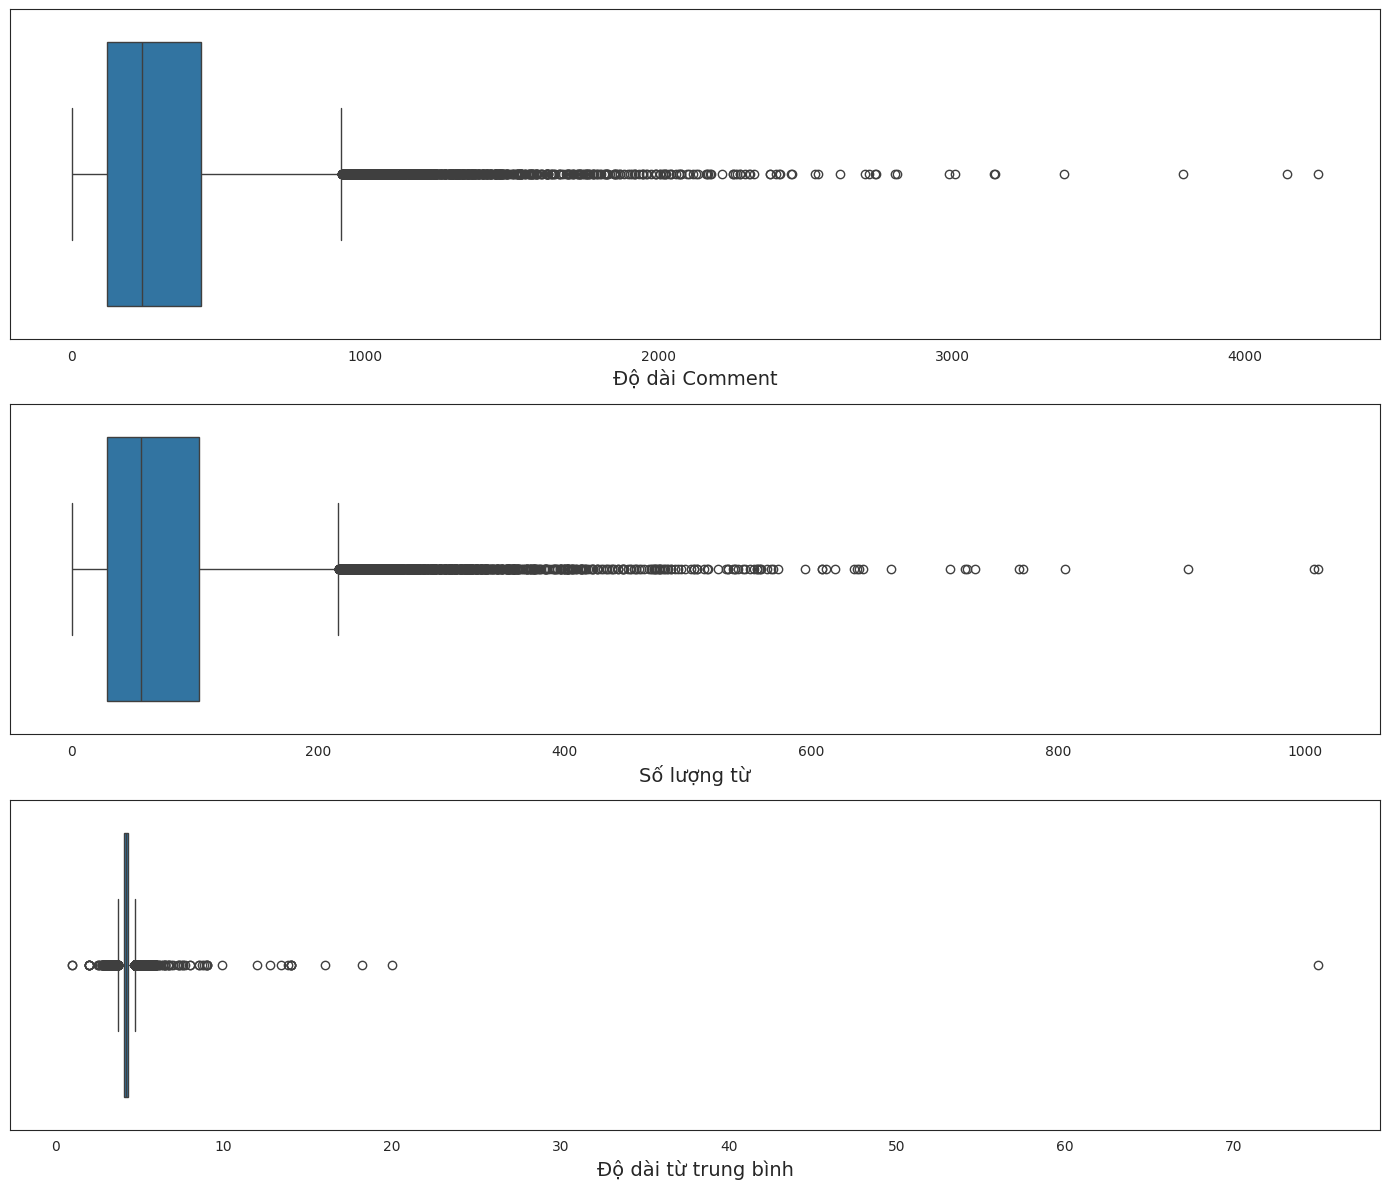

In [40]:
# Phân bố số lượng từ trong comment

fig = plt.figure(figsize=(14,12))
plt.subplot(3,1,1)
sns.boxplot(data=df , x='Comment_len')
plt.xlabel('Độ dài Comment',fontsize=14)

plt.subplot(3,1,2)
sns.boxplot(data=df , x='Comment_lenword')
plt.xlabel('Số lượng từ',fontsize=14)

plt.subplot(3,1,3)
sns.boxplot(data=df , x='Comment_avgword')
plt.xlabel('Độ dài từ trung bình',fontsize=14)
plt.tight_layout()
plt.show()

In [41]:
check_outlier(df['Comment_len'])

Q1:        121.0
Q3:        440.0
IQR:       319.0
# Number of upper outliers:  1126
# Number of lower outliers:  0
# Percentage of ouliers:     0.03762991678641847


In [42]:
check_outlier(df['Comment_lenword'])

Q1:        29.0
Q3:        104.0
IQR:       75.0
# Number of upper outliers:  1176
# Number of lower outliers:  0
# Percentage of ouliers:     0.039300872238746114


In [43]:
check_outlier(df['Comment_avgword'])

Q1:        4.071428571428571
Q3:        4.3238095238095235
IQR:       0.2523809523809524
# Number of upper outliers:  668
# Number of lower outliers:  1279
# Percentage of ouliers:     0.06506700531363833


In [44]:
remove_outlier('Comment_len',df)
remove_outlier('Comment_lenword',df)
remove_outlier('Comment_avgword',df)

,IDRestaurant,Restaurant,Address,District,Price,User,Comment,Rating,Time,Comment_len,Comment_lenword,Comment_avgword
0,1,Gà Rán & Burger McDonald's Đa Kao,"2 - 6 Bis Điện Biên Phủ, Quận 1, TP. HCM",Quận 1,50.000 - 200.000,Quyên Quyên,Đã thư rất ngon,5.0,24/6/2023 11:11,15,4,3.750000
1,1,Gà Rán & Burger McDonald's Đa Kao,"2 - 6 Bis Điện Biên Phủ, Quận 1, TP. HCM",Quận 1,50.000 - 200.000,Phương Thảo,Tệ mua mang về cho 1 gói tương ớt Và xin thêm ...,1.0,22/12/2022 14:58,211,50,4.220000
2,1,Gà Rán & Burger McDonald's Đa Kao,"2 - 6 Bis Điện Biên Phủ, Quận 1, TP. HCM",Quận 1,50.000 - 200.000,Quỳnh Nguyễn,21h30 2 đứa nhỏ kêu đói sau 1 hồi bình loạn là...,4.2,23/9/2022 22:40,228,57,4.000000
3,1,Gà Rán & Burger McDonald's Đa Kao,"2 - 6 Bis Điện Biên Phủ, Quận 1, TP. HCM",Quận 1,50.000 - 200.000,Tien Le,Nay có khuyến mại mua 1 tặng 1 trà kem sữa Uốn...,7.4,15/9/2022 11:32,64,17,3.764706
4,1,Gà Rán & Burger McDonald's Đa Kao,"2 - 6 Bis Điện Biên Phủ, Quận 1, TP. HCM",Quận 1,50.000 - 200.000,Anna,Thề lâu lắm rồi t mới tức giận ntn T có xem qu...,1.0,4/7/2022 1:31,625,148,4.222973
...,...,...,...,...,...,...,...,...,...,...,...,...
26798,1589,Bánh Sầu Riêng 9 Sạch - Nguyễn Ảnh Thủ,"466 Đường Nguyễn Ảnh Thủ, P. Hiệp Thành, Quận ...",Quận 12,30.000 - 170.000,Lan Anh Nguyen,Bánh sầu riêng ngon nhất từng ăn sầu nhiều và ...,10.0,27/11/2023 11:16,50,11,4.545455
26799,1595,Tiên Tiên - Bún Thái Cay - Tân Chánh Hiệp 16,"52/4A Tân Chánh Hiệp 16, P. Tân Chánh Hiệp (Đầ...",Quận 12,25.000 - 200.000,Trannuhamy,Đặt quán bún thái này trong chương trình của c...,7.0,26/10/2020 12:16,184,40,4.600000
26800,1609,"3 Râu - Gà Rán, Pizza & Trà Sữa - 107 Nguyễn V...","107 Nguyễn Văn Quá, P. Đông Hưng Thuận, Quận 1...",Quận 12,12.000 - 120.000,Tú,Phục vụ quá tệ Pizza xúc xích double phô mai m...,3.4,31/1/2021 14:29,151,36,4.194444
26801,1609,"3 Râu - Gà Rán, Pizza & Trà Sữa - 107 Nguyễn V...","107 Nguyễn Văn Quá, P. Đông Hưng Thuận, Quận 1...",Quận 12,12.000 - 120.000,Hoàng Hậu Mai,Đang thèm gà rán thì lướt trúng ngay combo gà ...,7.6,27/10/2020 18:06,326,73,4.465753


In [45]:
##LOAD EMOJICON
file = open('files/emojicon.txt', 'r', encoding="utf8")
emoji_lst = file.read().split('\n')
emoji_dict = {}
for line in emoji_lst:
    key, value = line.split('\t')
    emoji_dict[key] = str(value)
file.close()
#################
#LOAD TEENCODE
file = open('files/teencode.txt', 'r', encoding="utf8")
teen_lst = file.read().split('\n')
teen_dict = {}
for line in teen_lst:
    key, value = line.split('\t')
    teen_dict[key] = str(value)
file.close()
###############
#LOAD TRANSLATE ENGLISH -> VNMESE
file = open('files/english-vnmese.txt', 'r', encoding="utf8")
english_lst = file.read().split('\n')
english_dict = {}
for line in english_lst:
    key, value = line.split('\t')
    english_dict[key] = str(value)
file.close()
################
#LOAD wrong words
file = open('files/wrong-word.txt', 'r', encoding="utf8")
wrong_lst = file.read().split('\n')
file.close()
#################
#LOAD STOPWORDS
file = open('files/vietnamese-stopwords.txt', 'r', encoding="utf8")
stopwords_lst = file.read().split('\n')
file.close()

In [46]:
def process_text(text, emoji_dict, teen_dict, wrong_lst):
    document = text.lower()
    document = document.replace("’",'')
    document = regex.sub(r'\.+', ".", document)
    new_sentence =''
    for sentence in sent_tokenize(document):
        # if not(sentence.isascii()):
        ###### CONVERT EMOJICON
        sentence = ''.join(emoji_dict[word]+' ' if word in emoji_dict else word for word in list(sentence))
        ###### CONVERT TEENCODE
        sentence = ' '.join(teen_dict[word] if word in teen_dict else word for word in sentence.split())
        ###### DEL Punctuation & Numbers
        pattern = r'(?i)\b[a-záàảãạăắằẳẵặâấầẩẫậéèẻẽẹêếềểễệóòỏõọôốồổỗộơớờởỡợíìỉĩịúùủũụưứừửữựýỳỷỹỵđ]+\b'
        sentence = ' '.join(regex.findall(pattern,sentence))
        ###### DEL wrong words
        sentence = ' '.join('' if word in wrong_lst else word for word in sentence.split())
        new_sentence = new_sentence+ sentence + '. '
    document = new_sentence
    #print(document)
    ###### DEL excess blank space
    document = regex.sub(r'\s+', ' ', document).strip()
    return document

In [47]:
# Chuẩn hóa unicode tiếng việt
def loaddicchar():
    uniChars = "àáảãạâầấẩẫậăằắẳẵặèéẻẽẹêềếểễệđìíỉĩịòóỏõọôồốổỗộơờớởỡợùúủũụưừứửữựỳýỷỹỵÀÁẢÃẠÂẦẤẨẪẬĂẰẮẲẴẶÈÉẺẼẸÊỀẾỂỄỆĐÌÍỈĨỊÒÓỎÕỌÔỒỐỔỖỘƠỜỚỞỠỢÙÚỦŨỤƯỪỨỬỮỰỲÝỶỸỴÂĂĐÔƠƯ"
    unsignChars = "aaaaaaaaaaaaaaaaaeeeeeeeeeeediiiiiooooooooooooooooouuuuuuuuuuuyyyyyAAAAAAAAAAAAAAAAAEEEEEEEEEEEDIIIOOOOOOOOOOOOOOOOOOOUUUUUUUUUUUYYYYYAADOOU"

    dic = {}
    char1252 = 'à|á|ả|ã|ạ|ầ|ấ|ẩ|ẫ|ậ|ằ|ắ|ẳ|ẵ|ặ|è|é|ẻ|ẽ|ẹ|ề|ế|ể|ễ|ệ|ì|í|ỉ|ĩ|ị|ò|ó|ỏ|õ|ọ|ồ|ố|ổ|ỗ|ộ|ờ|ớ|ở|ỡ|ợ|ù|ú|ủ|ũ|ụ|ừ|ứ|ử|ữ|ự|ỳ|ý|ỷ|ỹ|ỵ|À|Á|Ả|Ã|Ạ|Ầ|Ấ|Ẩ|Ẫ|Ậ|Ằ|Ắ|Ẳ|Ẵ|Ặ|È|É|Ẻ|Ẽ|Ẹ|Ề|Ế|Ể|Ễ|Ệ|Ì|Í|Ỉ|Ĩ|Ị|Ò|Ó|Ỏ|Õ|Ọ|Ồ|Ố|Ổ|Ỗ|Ộ|Ờ|Ớ|Ở|Ỡ|Ợ|Ù|Ú|Ủ|Ũ|Ụ|Ừ|Ứ|Ử|Ữ|Ự|Ỳ|Ý|Ỷ|Ỹ|Ỵ'.split(
        '|')
    charutf8 = "à|á|ả|ã|ạ|ầ|ấ|ẩ|ẫ|ậ|ằ|ắ|ẳ|ẵ|ặ|è|é|ẻ|ẽ|ẹ|ề|ế|ể|ễ|ệ|ì|í|ỉ|ĩ|ị|ò|ó|ỏ|õ|ọ|ồ|ố|ổ|ỗ|ộ|ờ|ớ|ở|ỡ|ợ|ù|ú|ủ|ũ|ụ|ừ|ứ|ử|ữ|ự|ỳ|ý|ỷ|ỹ|ỵ|À|Á|Ả|Ã|Ạ|Ầ|Ấ|Ẩ|Ẫ|Ậ|Ằ|Ắ|Ẳ|Ẵ|Ặ|È|É|Ẻ|Ẽ|Ẹ|Ề|Ế|Ể|Ễ|Ệ|Ì|Í|Ỉ|Ĩ|Ị|Ò|Ó|Ỏ|Õ|Ọ|Ồ|Ố|Ổ|Ỗ|Ộ|Ờ|Ớ|Ở|Ỡ|Ợ|Ù|Ú|Ủ|Ũ|Ụ|Ừ|Ứ|Ử|Ữ|Ự|Ỳ|Ý|Ỷ|Ỹ|Ỵ".split(
        '|')
    for i in range(len(char1252)):
        dic[char1252[i]] = charutf8[i]
    return dic

# Đưa toàn bộ dữ liệu qua hàm này để chuẩn hóa lại
def convert_unicode(txt):
    dicchar = loaddicchar()
    return regex.sub(
        r'à|á|ả|ã|ạ|ầ|ấ|ẩ|ẫ|ậ|ằ|ắ|ẳ|ẵ|ặ|è|é|ẻ|ẽ|ẹ|ề|ế|ể|ễ|ệ|ì|í|ỉ|ĩ|ị|ò|ó|ỏ|õ|ọ|ồ|ố|ổ|ỗ|ộ|ờ|ớ|ở|ỡ|ợ|ù|ú|ủ|ũ|ụ|ừ|ứ|ử|ữ|ự|ỳ|ý|ỷ|ỹ|ỵ|À|Á|Ả|Ã|Ạ|Ầ|Ấ|Ẩ|Ẫ|Ậ|Ằ|Ắ|Ẳ|Ẵ|Ặ|È|É|Ẻ|Ẽ|Ẹ|Ề|Ế|Ể|Ễ|Ệ|Ì|Í|Ỉ|Ĩ|Ị|Ò|Ó|Ỏ|Õ|Ọ|Ồ|Ố|Ổ|Ỗ|Ộ|Ờ|Ớ|Ở|Ỡ|Ợ|Ù|Ú|Ủ|Ũ|Ụ|Ừ|Ứ|Ử|Ữ|Ự|Ỳ|Ý|Ỷ|Ỹ|Ỵ',
        lambda x: dicchar[x.group()], txt)

In [48]:
# có thể bổ sung thêm các từ: chẳng, chả...
def process_special_word(text):
    new_text = ''
    text_lst = text.split()
    i= 0
    if 'không' in text_lst:
        while i <= len(text_lst) - 1:
            word = text_lst[i]
            #print(word)
            #print(i)
            if  word == 'không':
                next_idx = i+1
                if next_idx <= len(text_lst) -1:
                    word = word +'_'+ text_lst[next_idx]
                    #print(word)
                i= next_idx + 1
            else:
                i = i+1
            new_text = new_text + word + ' '
    elif 'tạm' in text_lst:
        while i <= len(text_lst) - 1:
            word = text_lst[i]
#             print(word)
#             print(i)
            if  word == 'tạm':
                next_idx = i+1
                if next_idx <= len(text_lst) -1:
                    word = word +'_'+ text_lst[next_idx]

                i= next_idx + 1
            else:
                i = i+1
            new_text = new_text + word + ' '
            #print(new_text)
    elif 'hơi' in text_lst:
        while i <= len(text_lst) - 1:
            word = text_lst[i]
            if  word == 'hơi':
                next_idx = i+1
                if next_idx <= len(text_lst) -1:
                    word = word +'_'+ text_lst[next_idx]
#                     print(word)
                i= next_idx + 1
            else:
                i = i+1
            new_text = new_text + word + ' '
            #print(new_text)
    elif 'chẳng' in text_lst:
        while i <= len(text_lst) - 1:
            word = text_lst[i]
            if  word == 'chẳng':
                next_idx = i+1
                if next_idx <= len(text_lst) -1:
                    word = word +'_'+ text_lst[next_idx]
                i= next_idx + 1
            else:
                i = i+1
            new_text = new_text + word + ' '
            #print(new_text)
    elif 'chả' in text_lst:
        while i <= len(text_lst) - 1:
            word = text_lst[i]
            if  word == 'chả':
                next_idx = i+1
                if next_idx <= len(text_lst) -1:
                    word = word +'_'+ text_lst[next_idx]
                i= next_idx + 1
            else:
                i = i+1
            new_text = new_text + word + ' '
            #print(new_text)
    elif 'quá' in text_lst:
        while i <= len(text_lst) - 1:
            word = text_lst[i]
            if  word == 'quá':
                next_idx = i+1
                if next_idx <= len(text_lst) -1:
                    word = word +'_'+ text_lst[next_idx]
                i= next_idx + 1
            else:
                i = i+1
            new_text = new_text + word + ' '
            #print(new_text)
    elif 'giao' in text_lst:
        while i <= len(text_lst) - 1:
            word = text_lst[i]
            if  word == 'giao':
                next_idx = i+1
                if next_idx <= len(text_lst) -1:
                    word = word +'_'+ text_lst[next_idx]
                i= next_idx + 1
            else:
                i = i+1
            new_text = new_text + word + ' '
            #print(new_text)
    elif 'khá' in text_lst:
        while i <= len(text_lst) - 1:
            word = text_lst[i]
            if  word == 'khá':
                next_idx = i+1
                if next_idx <= len(text_lst) -1:
                    word = word +'_'+ text_lst[next_idx]
                i= next_idx + 1
            else:
                i = i+1
            new_text = new_text + word + ' '
            #print(new_text)
    elif 'hơn' in text_lst:
        while i <= len(text_lst) - 1:
            word = text_lst[i]
            if  word == 'hơn':
                back_idx = i-1
                if back_idx >=1:
                    cache=text_lst[back_idx]
                    new_text=new_text.replace(cache, '')
#                     print(new_text)
#                     print(text_lst)
                    word =  cache+'_'+ word
                    #print(text_lst)
                i= back_idx + 2
            else:
                i = i+1
            #print(word)
            new_text = new_text + word + ' '
    else:
        new_text = text
    return new_text.strip()

In [49]:
def xu_li_text(word,lst_word_type,lst_word_type_special):
    if (word[1].upper() in lst_word_type) and word[0]!="chất_lượng":
        return word[0]
    elif (word[1].upper() in lst_word_type_special) and word[0]=="chất_lượng":
        return word[0]
    else:
        return ""

In [50]:
def process_postag_thesea(text):
    new_document = ''
    for sentence in sent_tokenize(text):
        sentence = sentence.replace('.','')
        ###### POS tag
        lst_word_type = ['A','AB','VB','VY','R','M','Nu','V','N','NP']
        lst_word_type_special= ['A','AB','VB','VY','R','M','Nu']
        #lst_word_type = ['A','AB','V','VB','VY','R']
        sentence = ' '.join(xu_li_text(word,lst_word_type,lst_word_type_special) for word in pos_tag(process_special_word(word_tokenize(sentence, format="text"))))
        new_document = new_document + sentence + ' '
    ###### DEL excess blank space
    new_document = regex.sub(r'\s+', ' ', new_document).strip()
    return new_document

In [51]:
def remove_stopword(text, stopwords):
    ###### REMOVE stop words
    document = ' '.join('' if word in stopwords else word for word in text.split())
    #print(document)
    ###### DEL excess blank space
    document = regex.sub(r'\s+', ' ', document).strip()
    return document

In [52]:
t0=datetime.datetime.now()

In [53]:
# # Xử lý tiếng việt thô
df['Comment_pre'] = df['Comment'].apply(lambda x: process_text(x, emoji_dict, teen_dict, wrong_lst))

In [54]:
# Chuẩn hóa unicode tiếng việt
df['Comment_pre'] = df['Comment_pre'].apply(lambda x: covert_unicode(x))

In [55]:
# Kí tự đặc biệt
df['Comment_pre'] = df['Comment_pre'].apply(lambda x: process_special_word(x))

In [56]:
# postag_thesea
df['Comment_pre'] = df['Comment_pre'].apply(lambda x: process_postag_thesea(x))

In [57]:
#  remove stopword vietnames
df['Comment_pre'] = df['Comment_pre'].apply(lambda x: remove_stopword(x,stopwords_lst))

In [58]:
now = datetime.datetime.now()
print('Xử lý tiếng việt mất : ',now-t0)

Xử lý tiếng việt mất :  0:16:38.530016


In [59]:
df.head()

,IDRestaurant,Restaurant,Address,District,Price,User,Comment,Rating,Time,Comment_len,Comment_lenword,Comment_avgword,Comment_pre
0,1,Gà Rán & Burger McDonald's Đa Kao,"2 - 6 Bis Điện Biên Phủ, Quận 1, TP. HCM",Quận 1,50.000 - 200.000,Quyên Quyên,Đã thư rất ngon,5.0,24/6/2023 11:11,15,4,3.750000,thư
1,1,Gà Rán & Burger McDonald's Đa Kao,"2 - 6 Bis Điện Biên Phủ, Quận 1, TP. HCM",Quận 1,50.000 - 200.000,Phương Thảo,Tệ mua mang về cho 1 gói tương ớt Và xin thêm ...,1.0,22/12/2022 14:58,211,50,4.220000,tệ gói tương_ớt tương_về tương món gói không_h...
2,1,Gà Rán & Burger McDonald's Đa Kao,"2 - 6 Bis Điện Biên Phủ, Quận 1, TP. HCM",Quận 1,50.000 - 200.000,Quỳnh Nguyễn,21h30 2 đứa nhỏ kêu đói sau 1 hồi bình loạn là...,4.2,23/9/2022 22:40,228,57,4.000000,kêu đói hồi bình_loạn chốt háo_hức nỡ_lòng lượ...
3,1,Gà Rán & Burger McDonald's Đa Kao,"2 - 6 Bis Điện Biên Phủ, Quận 1, TP. HCM",Quận 1,50.000 - 200.000,Tien Le,Nay có khuyến mại mua 1 tặng 1 trà kem sữa Uốn...,7.4,15/9/2022 11:32,64,17,3.764706,khuyến_mại tặng trà sữa uống đồ_ăn
4,1,Gà Rán & Burger McDonald's Đa Kao,"2 - 6 Bis Điện Biên Phủ, Quận 1, TP. HCM",Quận 1,50.000 - 200.000,Anna,Thề lâu lắm rồi t mới tức giận ntn T có xem qu...,1.0,4/7/2022 1:31,625,148,4.222973,thề lắm tức_giận thế_này quảng_cáo minion háo_...


# 4. Trực quan hoá dữ liệu

In [60]:
df.head()

,IDRestaurant,Restaurant,Address,District,Price,User,Comment,Rating,Time,Comment_len,Comment_lenword,Comment_avgword,Comment_pre
0,1,Gà Rán & Burger McDonald's Đa Kao,"2 - 6 Bis Điện Biên Phủ, Quận 1, TP. HCM",Quận 1,50.000 - 200.000,Quyên Quyên,Đã thư rất ngon,5.0,24/6/2023 11:11,15,4,3.750000,thư
1,1,Gà Rán & Burger McDonald's Đa Kao,"2 - 6 Bis Điện Biên Phủ, Quận 1, TP. HCM",Quận 1,50.000 - 200.000,Phương Thảo,Tệ mua mang về cho 1 gói tương ớt Và xin thêm ...,1.0,22/12/2022 14:58,211,50,4.220000,tệ gói tương_ớt tương_về tương món gói không_h...
2,1,Gà Rán & Burger McDonald's Đa Kao,"2 - 6 Bis Điện Biên Phủ, Quận 1, TP. HCM",Quận 1,50.000 - 200.000,Quỳnh Nguyễn,21h30 2 đứa nhỏ kêu đói sau 1 hồi bình loạn là...,4.2,23/9/2022 22:40,228,57,4.000000,kêu đói hồi bình_loạn chốt háo_hức nỡ_lòng lượ...
3,1,Gà Rán & Burger McDonald's Đa Kao,"2 - 6 Bis Điện Biên Phủ, Quận 1, TP. HCM",Quận 1,50.000 - 200.000,Tien Le,Nay có khuyến mại mua 1 tặng 1 trà kem sữa Uốn...,7.4,15/9/2022 11:32,64,17,3.764706,khuyến_mại tặng trà sữa uống đồ_ăn
4,1,Gà Rán & Burger McDonald's Đa Kao,"2 - 6 Bis Điện Biên Phủ, Quận 1, TP. HCM",Quận 1,50.000 - 200.000,Anna,Thề lâu lắm rồi t mới tức giận ntn T có xem qu...,1.0,4/7/2022 1:31,625,148,4.222973,thề lắm tức_giận thế_này quảng_cáo minion háo_...


In [61]:
# Check bao nhiêu người comment cho mỗi Rating
df['Rating'].value_counts().sort_index()

Rating
0.0        6
1.0     1059
1.2       58
1.4       55
1.6       59
1.8      145
2.0      119
2.2      112
2.4       81
2.6      244
2.8      109
3.0      149
3.2      134
3.4      393
3.6      150
3.8      197
4.0      187
4.2      425
4.4      193
4.6      192
4.8      206
5.0     1190
5.2      132
5.4      188
5.6      230
5.8      259
6.0      655
6.2      404
6.4      477
6.6      582
6.8      718
7.0     1574
7.2     1138
7.4     1187
7.6     1173
7.8     1117
8.0     1788
8.2      973
8.4      811
8.6      792
8.8      721
9.0     1113
9.2      592
9.4      578
9.6      656
9.8      537
10.0    2945
Name: count, dtype: int64

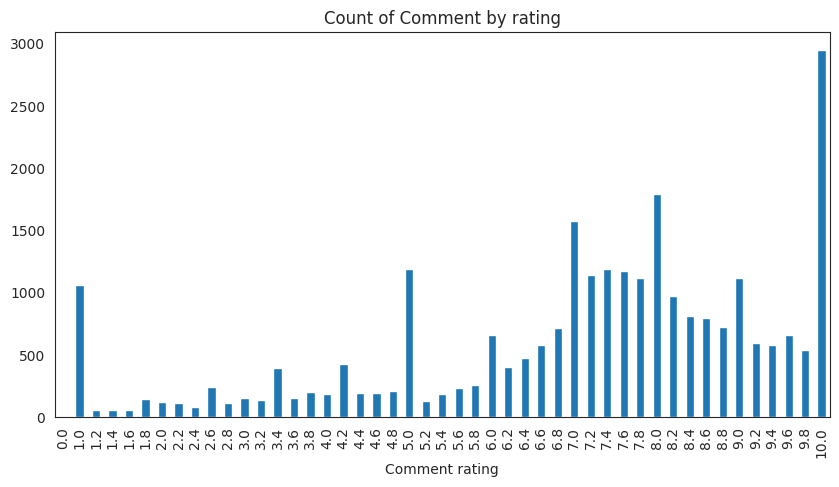

In [62]:
# Visualize count of reviews by rating
ax = df['Rating'].value_counts().sort_index().plot(kind = 'bar',
                                                     title = 'Count of Comment by rating',
                                                     figsize = (10, 5))
ax.set_xlabel('Comment rating')
plt.show()

### 5. Tạo wordcloud của Like và Dislike & Neutral comment. Trực quan hóa dữ liệu wordcloud.

In [63]:
def func_class(s):
    if s>=7:
        return "Like"
    elif s<=4.5:
        return "Dislike"
    return "Neutral"

df["class"]=df["Rating"].apply(lambda x: func_class(x))

In [64]:
df_sub = df.loc[:, ['Comment', 'Rating', 'class', 'Comment_pre']]
df_sub.head()

,Comment,Rating,class,Comment_pre
0,Đã thư rất ngon,5.0,Neutral,thư
1,Tệ mua mang về cho 1 gói tương ớt Và xin thêm ...,1.0,Dislike,tệ gói tương_ớt tương_về tương món gói không_h...
2,21h30 2 đứa nhỏ kêu đói sau 1 hồi bình loạn là...,4.2,Dislike,kêu đói hồi bình_loạn chốt háo_hức nỡ_lòng lượ...
3,Nay có khuyến mại mua 1 tặng 1 trà kem sữa Uốn...,7.4,Like,khuyến_mại tặng trà sữa uống đồ_ăn
4,Thề lâu lắm rồi t mới tức giận ntn T có xem qu...,1.0,Dislike,thề lắm tức_giận thế_này quảng_cáo minion háo_...


In [65]:
wordcloud_0 = df_sub[df_sub['class'] == "Like"].drop(['class',"Rating"], axis=1)
wordcloud_1 = df_sub[df_sub['class'] == "Dislike"].drop(['class',"Rating"], axis=1)
wordcloud_2 = df_sub[df_sub['class'] == "Neutral"].drop(['class',"Rating"], axis=1)

In [66]:
dfs=[wordcloud_0,wordcloud_1,wordcloud_2]

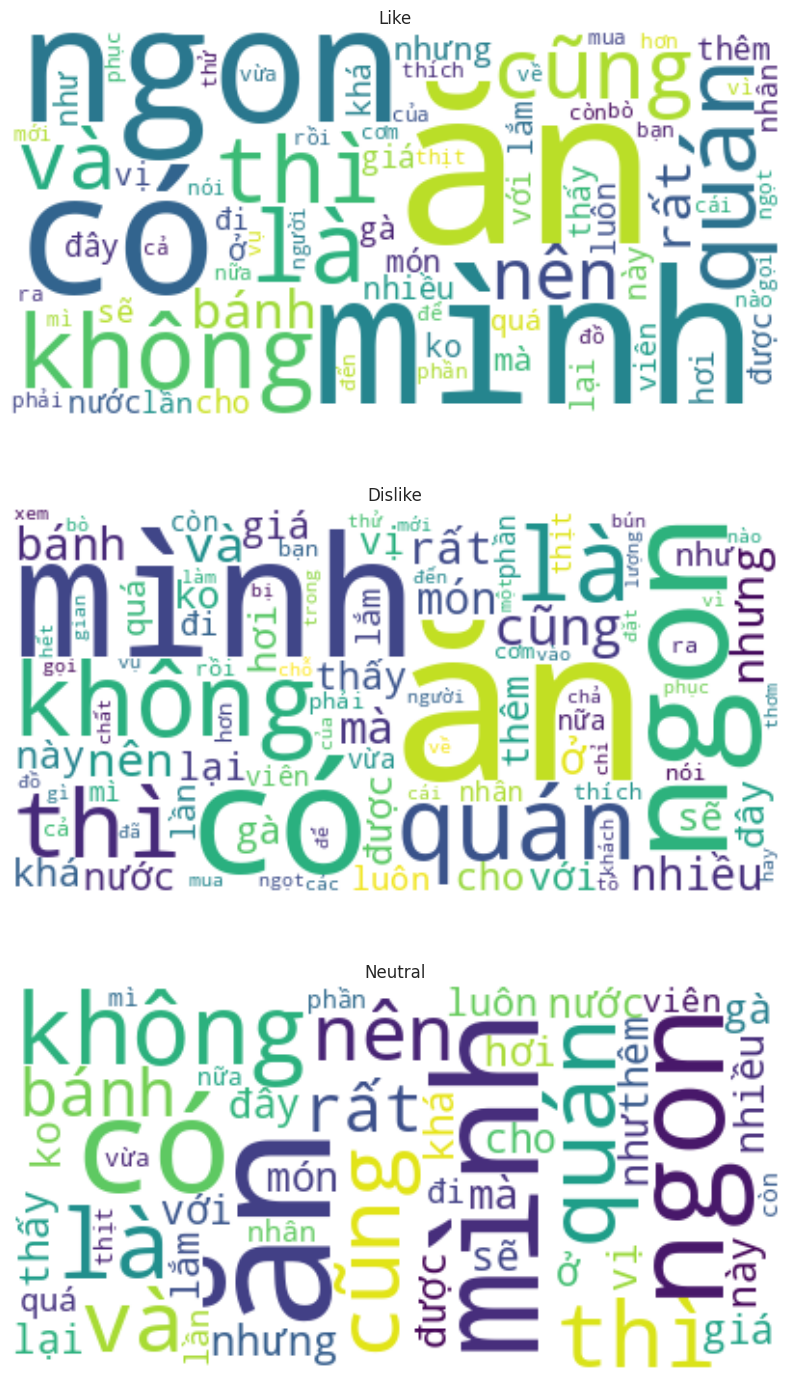

In [67]:
# View cột Comment chưa xử lý
comment_words = ''
#stopwords = set(STOPWORDS)
plt.figure(figsize = (20, 15), facecolor = None)
j=1
for df in dfs:
    wordcloud=""
    comment_words=""
    for val in df_sub.Comment:

        val = str(val)

        tokens = val.split()

        for i in range(len(tokens)):
            tokens[i] = tokens[i].lower()

        comment_words += " ".join(tokens)+" "

    wordcloud = WordCloud(background_color ='white',max_words=1000,
                      min_font_size = 10,collocations=False).generate(comment_words)

    plt.subplot(len(dfs), 1, j)
    plt.imshow(wordcloud,interpolation="bilinear")
    if j-1==0:
        plt.gca().set_title('Like')
    elif j-1==1:
        plt.gca().set_title('Dislike')
    else:
        plt.gca().set_title('Neutral')



    plt.axis("off")
    plt.tight_layout(pad = 5)
    j+=1
plt.savefig("pictures/wordcloud_prefix.png", bbox_inches='tight')
plt.show()

In [68]:
df_sub.isnull().sum()

Comment        0
Rating         0
class          0
Comment_pre    0
dtype: int64

In [69]:
df_sub.head()

,Comment,Rating,class,Comment_pre
0,Đã thư rất ngon,5.0,Neutral,thư
1,Tệ mua mang về cho 1 gói tương ớt Và xin thêm ...,1.0,Dislike,tệ gói tương_ớt tương_về tương món gói không_h...
2,21h30 2 đứa nhỏ kêu đói sau 1 hồi bình loạn là...,4.2,Dislike,kêu đói hồi bình_loạn chốt háo_hức nỡ_lòng lượ...
3,Nay có khuyến mại mua 1 tặng 1 trà kem sữa Uốn...,7.4,Like,khuyến_mại tặng trà sữa uống đồ_ăn
4,Thề lâu lắm rồi t mới tức giận ntn T có xem qu...,1.0,Dislike,thề lắm tức_giận thế_này quảng_cáo minion háo_...


In [70]:
df_sub.drop(df_sub[df_sub["Comment_pre"]==""].index, axis=0, inplace=True)

In [71]:
df_sub.count()

Comment        26579
Rating         26579
class          26579
Comment_pre    26579
dtype: int64

In [72]:
df_sub.head()

,Comment,Rating,class,Comment_pre
0,Đã thư rất ngon,5.0,Neutral,thư
1,Tệ mua mang về cho 1 gói tương ớt Và xin thêm ...,1.0,Dislike,tệ gói tương_ớt tương_về tương món gói không_h...
2,21h30 2 đứa nhỏ kêu đói sau 1 hồi bình loạn là...,4.2,Dislike,kêu đói hồi bình_loạn chốt háo_hức nỡ_lòng lượ...
3,Nay có khuyến mại mua 1 tặng 1 trà kem sữa Uốn...,7.4,Like,khuyến_mại tặng trà sữa uống đồ_ăn
4,Thề lâu lắm rồi t mới tức giận ntn T có xem qu...,1.0,Dislike,thề lắm tức_giận thế_này quảng_cáo minion háo_...


In [73]:
wordcloud_0 = df_sub[df_sub['class'] == "Like"].drop(['class'], axis=1)
wordcloud_1 = df_sub[df_sub['class'] == "Dislike"].drop(['class'], axis=1)
wordcloud_2 = df_sub[df_sub['class'] == "Neutral"].drop(['class'], axis=1)

In [74]:
dfs_pre=[wordcloud_0,wordcloud_1,wordcloud_2]

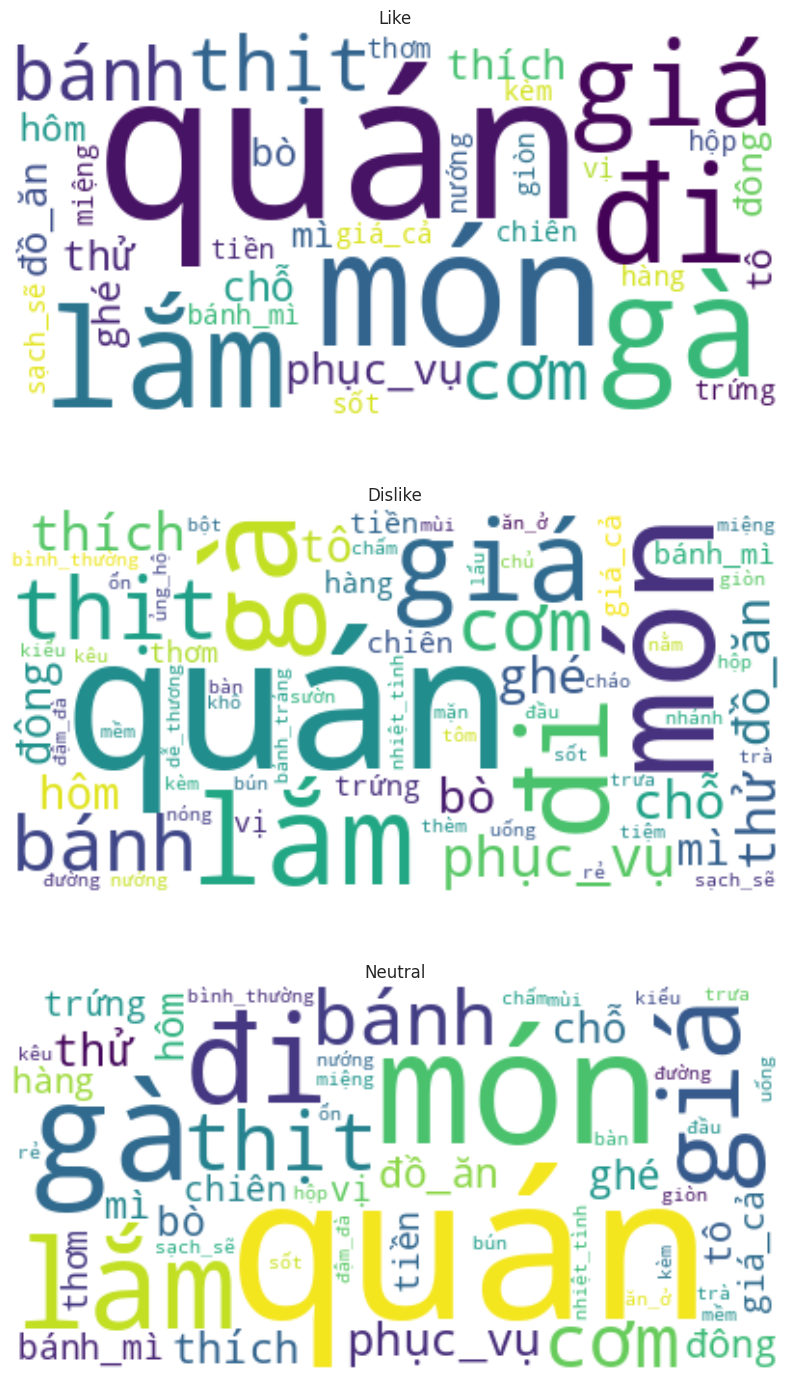

In [75]:
comment_words = ''
#stopwords = set(STOPWORDS)
plt.figure(figsize = (20, 15), facecolor = None)
j=1
for df in dfs_pre:
    wordcloud=""
    comment_words=""
    for val in df_sub.Comment_pre:

        val = str(val)

        tokens = val.split()

        for i in range(len(tokens)):
            tokens[i] = tokens[i].lower()

        comment_words += " ".join(tokens)+" "

    wordcloud = WordCloud(background_color ='white',max_words=1000,
                      min_font_size = 10,collocations=False).generate(comment_words)

    plt.subplot(len(dfs), 1, j)
    plt.imshow(wordcloud,interpolation="bilinear")
    if j-1==0:
        plt.gca().set_title('Like')
    elif j-1==1:
        plt.gca().set_title('Dislike')
    else:
        plt.gca().set_title('Neutral')



    plt.axis("off")
    plt.tight_layout(pad = 5)
    j+=1
plt.savefig("pictures/wordcloud_preprocessing", bbox_inches='tight')
plt.show()

In [76]:
# Reset index
df_sub.reset_index(drop=True, inplace=True)

In [77]:
df_sub.to_csv("data/pre_data.csv")

In [78]:
data_sum=df_sub.copy()

In [79]:
data_sum["count_word"]=data_sum["Comment_pre"].apply(lambda x:len(x.split()))

In [80]:
data_sum.head()

,Comment,Rating,class,Comment_pre,count_word
0,Đã thư rất ngon,5.0,Neutral,thư,1
1,Tệ mua mang về cho 1 gói tương ớt Và xin thêm ...,1.0,Dislike,tệ gói tương_ớt tương_về tương món gói không_h...,9
2,21h30 2 đứa nhỏ kêu đói sau 1 hồi bình loạn là...,4.2,Dislike,kêu đói hồi bình_loạn chốt háo_hức nỡ_lòng lượ...,16
3,Nay có khuyến mại mua 1 tặng 1 trà kem sữa Uốn...,7.4,Like,khuyến_mại tặng trà sữa uống đồ_ăn,6
4,Thề lâu lắm rồi t mới tức giận ntn T có xem qu...,1.0,Dislike,thề lắm tức_giận thế_này quảng_cáo minion háo_...,39


In [81]:
print(data_sum["count_word"].max())
print(data_sum["count_word"].min())

84
1


In [82]:
data_sum.groupby("class")["count_word"].agg(["min","max"])

,min,max
class,,
Dislike,1,81
Like,1,84
Neutral,1,81


In [83]:
data_sum.groupby("class").size().to_frame('counts')

,counts
class,
Dislike,3868
Like,17568
Neutral,5143
